In [9]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке,
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
#
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию,
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными,
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

In [10]:
# Данный блок в области 1 выполняется преподавателем
#
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler , Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold , RandomizedSearchCV
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score,precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [12]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели
#
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# Путь к тренировочному набору
#

path_train = "train.csv"

In [13]:
df = pd.read_csv(path_train)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.4,0.17,0.34,1.5,0.091,42.0,135.0,0.99380,3.25,0.49,9.6,7
1,8.0,0.42,0.36,5.0,0.037,34.0,101.0,0.99200,3.13,0.57,12.3,7
2,6.7,0.27,0.25,8.0,0.053,54.0,202.0,0.99610,3.22,0.43,9.3,5
3,5.2,0.21,0.31,1.7,0.048,17.0,61.0,0.98953,3.24,0.37,12.0,7
4,7.6,0.48,0.37,1.2,0.034,5.0,57.0,0.99256,3.05,0.54,10.4,3


In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000
mean,6.821797,0.283849,0.332545,5.725652,0.044460,34.615072,135.248116,0.993532,3.201449,0.492394,10.734348,6.004638
std,0.853886,0.106090,0.122279,4.570812,0.021236,16.751535,42.848854,0.002830,0.151395,0.121452,1.272796,1.071667
min,3.900000,0.085000,0.000000,0.600000,0.012000,3.000000,10.000000,0.987110,2.830000,0.220000,8.400000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.034000,23.000000,105.000000,0.991320,3.100000,0.400000,9.600000,5.000000
50%,6.800000,0.270000,0.320000,4.600000,0.041000,33.000000,130.000000,0.993200,3.190000,0.480000,10.600000,6.000000
75%,7.300000,0.330000,0.380000,8.700000,0.049000,45.000000,164.000000,0.995500,3.300000,0.560000,11.700000,7.000000
max,11.800000,1.100000,1.660000,20.700000,0.290000,124.000000,366.500000,1.001820,3.820000,1.080000,14.200000,9.000000


In [15]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
df['quality']=np.where(df['quality']>=7,1,0)

<Axes: >

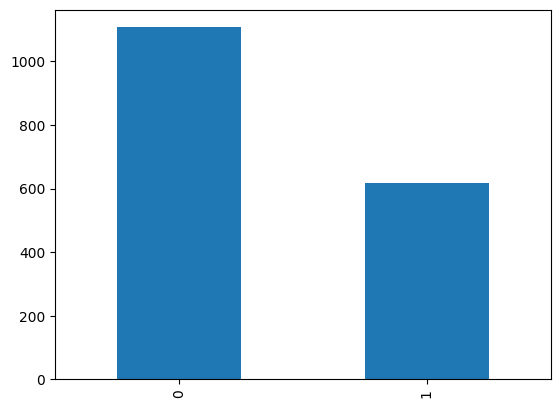

In [17]:
df['quality'].value_counts().plot(kind = 'bar')

In [18]:
X_train = df.drop(['quality'],axis = 1)
y_train = df['quality']
y_train

0       1
1       1
2       0
3       1
4       0
       ..
1720    0
1721    0
1722    1
1723    1
1724    1
Name: quality, Length: 1725, dtype: int64

In [19]:
pipe = Pipeline([
    ('preprocessing', MinMaxScaler()),
    ('regressor',    KNeighborsClassifier())])
kfold = KFold(n_splits=5, shuffle=True)
p = np.arange(1,7)
n_neighbors = np.arange(1,46,2)
weights = ['uniform','distance']
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]
param_grid = [
    {'preprocessing':scaling,
     'regressor': [KNeighborsClassifier()],
     'regressor__p':p,
     'regressor__n_neighbors': n_neighbors,
     'regressor__weights': weights}]

grid = GridSearchCV(pipe, param_grid,cv=kfold,return_train_score=True, n_jobs=-1)
grid.fit(X_train,y_train)



GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('regressor', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid=[{'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()],
                          'regressor': [KNeighborsClassifier(n_neighbors=33,
                                                             weights='distance')],
                          'regressor__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45]),
                          'regressor__p': array([1, 2, 3, 4, 5, 6]),
                          'regressor__weights': ['uniform', 'distance']}],
             return_train_score=True)

In [20]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,471,519,121,483,459,411,97,413,183,199,...,838,839,832,833,836,837,830,831,828,829
mean_fit_time,0.008546,0.010686,0.009136,0.008399,0.008555,0.008479,0.009231,0.008377,0.011243,0.008323,...,0.007818,0.008832,0.007918,0.007884,0.009689,0.007962,0.008137,0.008174,0.008173,0.00833
std_fit_time,0.000356,0.004515,0.000726,0.000241,0.000373,0.000292,0.001894,0.000433,0.003159,0.000589,...,0.000379,0.000859,0.000322,0.000376,0.002245,0.000684,0.000217,0.000261,0.000456,0.000408
mean_score_time,0.027549,0.02921,0.031695,0.027501,0.027205,0.025645,0.033531,0.202803,0.046236,0.156904,...,0.050037,0.018831,0.046231,0.019644,0.051248,0.019744,0.036737,0.006617,0.037547,0.00856
std_score_time,0.000711,0.001145,0.000337,0.000267,0.000586,0.00034,0.006229,0.011299,0.009488,0.007606,...,0.001982,0.000566,0.00156,0.000587,0.002268,0.001528,0.001693,0.0002,0.001604,0.000105
param_preprocessing,StandardScaler(),StandardScaler(),MinMaxScaler(),StandardScaler(),StandardScaler(),StandardScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),MinMaxScaler(),...,Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer()
param_regressor,"KNeighborsClassifier(n_neighbors=33, weights='...","KNeighborsClassifier(n_neighbors=33, weights='...","KNeighborsClassifier(n_neighbors=33, weights='...","KNeighborsClassifier(n_neighbors=33, weights='...","KNeighborsClassifier(n_neighbors=33, weights='...","KNeighborsClassifier(n_neighbors=33, weights='...","KNeighborsClassifier(n_neighbors=33, weights='...","KNeighborsClassifier(n_neighbors=33, weights='...","KNeighborsClassifier(n_neighbors=33, weights='...","KNeighborsClassifier(n_neighbors=33, weights='...",...,"KNeighborsClassifier(n_neighbors=33, weights='...","KNeighborsClassifier(n_neighbors=33, weights='...","KNeighborsClassifier(n_neighbors=33, weights='...","KNeighborsClassifier(n_neighbors=33, weights='...","KNeighborsClassifier(n_neighbors=33, weights='...","KNeighborsClassifier(n_neighbors=33, weights='...","KNeighborsClassifier(n_neighbors=33, weights='...","KNeighborsClassifier(n_neighbors=33, weights='...","KNeighborsClassifier(n_neighbors=33, weights='...","KNeighborsClassifier(n_neighbors=33, weights='..."
param_regressor__n_neighbors,33,41,21,35,31,23,17,23,31,33,...,1,1,1,1,1,1,1,1,1,1
param_regressor__p,2,2,1,2,2,2,1,3,2,4,...,6,6,3,3,5,5,2,2,1,1
param_regressor__weights,distance,distance,distance,distance,distance,distance,distance,distance,distance,distance,...,uniform,distance,uniform,distance,uniform,distance,uniform,distance,uniform,distance
params,"{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': MinMaxScaler(), 'regressor':...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': MinMaxScaler(), 'regressor':...","{'preprocessing': StandardScaler(), 'regressor...","{'preprocessing': MinMaxScaler(), 'regressor':...","{'preprocessing': MinMaxScaler(), 'regressor':...",...,"{'preprocessing': Normalizer(), 'regressor': K...","{'preprocessing': Normalizer(), 'regressor': K...","{'preprocessing': Normalizer(), 'regressor': K...","{'preprocessing': Normalizer(), 'regressor': K...","{'preprocessing': Normalizer(), 'regressor': K...","{'preprocessing': Normalizer(), 'regressor': K...","{'preprocessing': Normalizer(), 'regressor': K...","{'preprocessing': Normalizer(), 'regressor': K...","{'preprocessing': Normalizer(), 'regressor': K...","{'preprocessing': Normalizer(), 'regressor': K..."


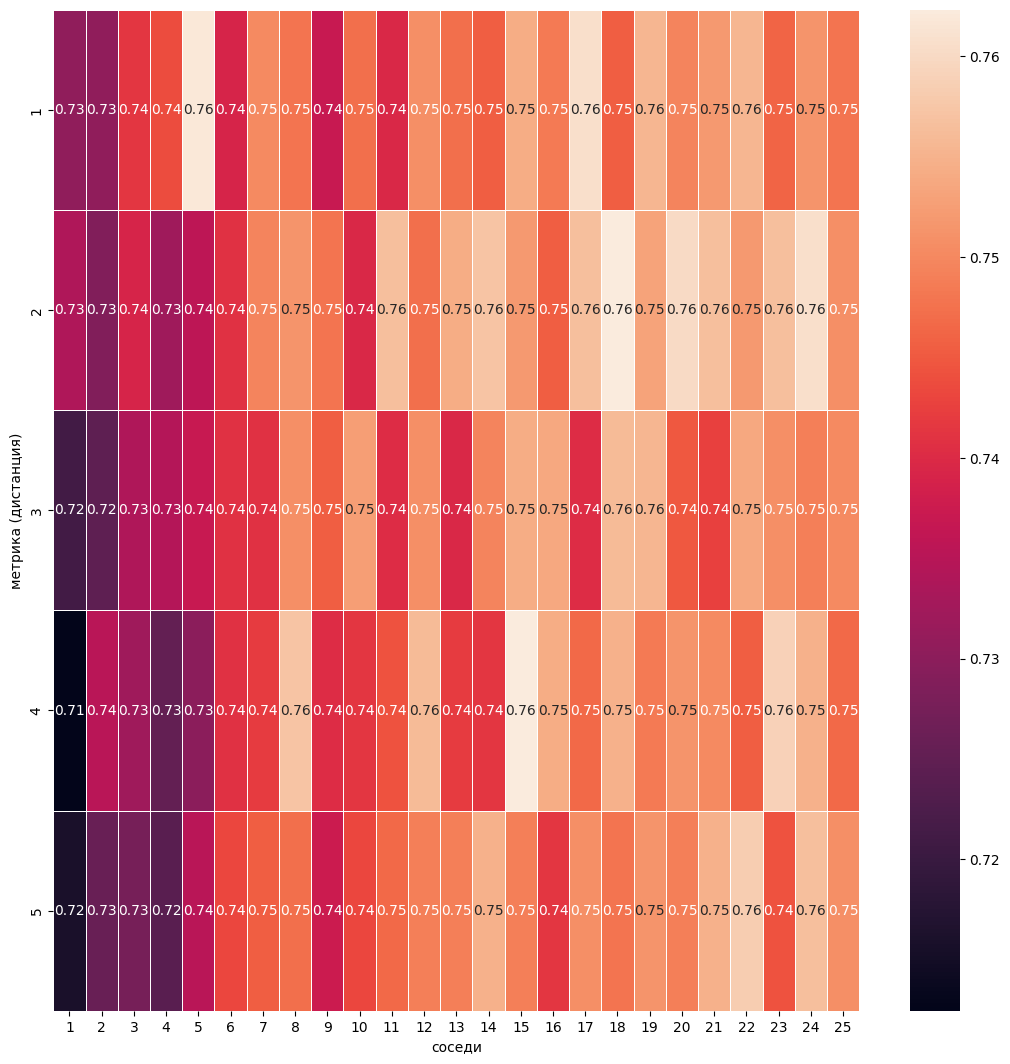

In [21]:
range_col = np.arange(1,26)
range_ind = np.arange(1,6)
grid_2d = [[np.mean(cross_val_score(
    Pipeline([
            ('preprocessing', MinMaxScaler()),
            ('regressor',     KNeighborsClassifier(n_neighbors = n, p = k, weights = 'uniform')
                   )]),
    X_train, y_train,scoring='accuracy', cv = kfold)) for n in range_col] for k in range_ind]

prid_pd = pd.DataFrame(grid_2d, columns = range_col, index = range_ind)

fig, ax = plt.subplots(figsize=(13,13))
s = sns.heatmap(prid_pd, annot=True, linewidths=.5,  ax=ax)
s.set(xlabel='соседи', ylabel='метрика (дистанция)'); #с ростом соседей падает метрика, оптимум - 4 соседа,метрика - евклидова

In [22]:
grid.best_score_

0.7652173913043478

In [23]:
pipe = Pipeline([('preprocessing', MinMaxScaler()),
                 ('clf',           LogisticRegression())])

kfold = KFold(n_splits=5, shuffle=True,random_state=29)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling,'clf__penalty': ['l2'],"clf__C": [0.001,0.01,0.1,1,10,100],
         'clf__solver': ['newton-cg' ,'lbfgs', 'liblinear', 'sag', 'saga']},
    {'preprocessing': scaling,'clf__penalty': ['l1'], "clf__C": [0.001,0.01,0.1,1,10,100],
         'clf__solver': ['liblinear']},
    {'preprocessing': scaling,'clf__penalty': ['none'],"clf__C": [0.001,0.01,0.1,1,10,100],
         'clf__solver': ['lbfgs','newton-cg']}
    ]

grid2 = RandomizedSearchCV(pipe, param_grid, cv = kfold, return_train_score = True)
grid2.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=29, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                             ('clf', LogisticRegression())]),
                   param_distributions=[{'clf__C': [0.001, 0.01, 0.1, 1, 10,
                                                    100],
                                         'clf__penalty': ['l2'],
                                         'clf__solver': ['newton-cg', 'lbfgs',
                                                         'liblinear', 'sag',
                                                         'saga'],
                                         'preprocessing': [MinMaxScaler(),
                                                           StandardScaler(),
                                                           Ro...
                                        {'clf__C': [0.001, 0.01, 0.1, 1, 10,
                                                    100],
                                         'clf__penalty': ['l1'],
                                         'clf__solver': ['liblinear'],
                                         'preprocessing': [MinMaxScaler(),
                                                           StandardScaler(),
                                                           RobustScaler(),
                                                           Normalizer()]},
                                        {'clf__C': [0.001, 0.01, 0.1, 1, 10,
                                                    100],
                                         'clf__penalty': ['none'],
                                         'clf__solver': ['lbfgs', 'newton-cg'],
                                         'preprocessing': [MinMaxScaler(),
                                                           StandardScaler(),
                                                           RobustScaler(),
                                                           Normalizer()]}],
                   return_train_score=True)

In [24]:
grid_result2 = pd.DataFrame(grid2.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result2

,1,7,6,3,2,9,8,0,5,4
mean_fit_time,0.014477,0.013863,0.011285,0.125481,0.030372,0.018819,0.009066,0.019511,0.010675,0.015621
std_fit_time,0.000765,0.000413,0.002827,0.020244,0.006374,0.003361,0.000524,0.006534,0.000549,0.003728
mean_score_time,0.002996,0.003354,0.003012,0.003425,0.003357,0.00666,0.002723,0.003345,0.003609,0.004593
std_score_time,0.000126,0.000982,0.000128,0.000173,0.000158,0.007218,0.000042,0.000522,0.000955,0.002903
param_preprocessing,StandardScaler(),StandardScaler(),StandardScaler(),Normalizer(),RobustScaler(),RobustScaler(),StandardScaler(),MinMaxScaler(),Normalizer(),Normalizer()
param_clf__solver,lbfgs,lbfgs,liblinear,newton-cg,liblinear,lbfgs,liblinear,lbfgs,liblinear,sag
param_clf__penalty,none,none,l2,none,l1,l2,l2,l2,l2,l2
param_clf__C,0.001,0.1,10,1,10,10,1,0.1,100,0.1
params,"{'preprocessing': StandardScaler(), 'clf__solv...","{'preprocessing': StandardScaler(), 'clf__solv...","{'preprocessing': StandardScaler(), 'clf__solv...","{'preprocessing': Normalizer(), 'clf__solver':...","{'preprocessing': RobustScaler(), 'clf__solver...","{'preprocessing': RobustScaler(), 'clf__solver...","{'preprocessing': StandardScaler(), 'clf__solv...","{'preprocessing': MinMaxScaler(), 'clf__solver...","{'preprocessing': Normalizer(), 'clf__solver':...","{'preprocessing': Normalizer(), 'clf__solver':..."
split0_test_score,0.747826,0.747826,0.747826,0.750725,0.747826,0.747826,0.744928,0.736232,0.710145,0.631884


In [25]:
pipe = Pipeline([('preprocessing', MinMaxScaler()),
                 ('clf',           GaussianNB())])

# n_splits = 5, random_state = 42 дают не улачную комбинацию и это хорошо для разбора ошибок решетки
kfold = KFold(n_splits=5, shuffle=True,random_state=42)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling,
     'clf': [GaussianNB()]}
    ]


grid3 = RandomizedSearchCV(pipe, param_grid, cv = kfold, return_train_score = True)
grid3.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                             ('clf', GaussianNB())]),
                   param_distributions=[{'clf': [GaussianNB()],
                                         'preprocessing': [MinMaxScaler(),
                                                           StandardScaler(),
                                                           RobustScaler(),
                                                           Normalizer()]}],
                   return_train_score=True)

In [26]:
grid_result3 = pd.DataFrame(grid3.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result3


,0,1,2,3
mean_fit_time,0.004699,0.004804,0.006787,0.003828
std_fit_time,0.000827,0.000818,0.00063,0.000071
mean_score_time,0.002074,0.002436,0.002439,0.002133
std_score_time,0.000063,0.000727,0.000587,0.000103
param_preprocessing,MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer()
param_clf,GaussianNB(),GaussianNB(),GaussianNB(),GaussianNB()
params,"{'preprocessing': MinMaxScaler(), 'clf': Gauss...","{'preprocessing': StandardScaler(), 'clf': Gau...","{'preprocessing': RobustScaler(), 'clf': Gauss...","{'preprocessing': Normalizer(), 'clf': Gaussia..."
split0_test_score,0.715942,0.715942,0.715942,0.614493
split1_test_score,0.742029,0.742029,0.742029,0.57971
split2_test_score,0.686957,0.686957,0.686957,0.643478


In [2]:
# Данный блок(и) в области 3 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными,
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать,
# тюниговать и т.д. модель машинного обучения

In [3]:
# Путь к тренировочному набору
path_train = 'train.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  = 'test.csv'# содержит только имя файла, без имен папок

In [4]:
df_wine_train = pd.read_csv(path_train)
df_wine_train['quality']=np.where(df_wine_train['quality']>=7,1,0)
X_train = df_wine_train.drop(['quality'],axis = 1)
y_train = df_wine_train['quality']
pipe =  Pipeline([
            ('preprocessing', RobustScaler()),
            ('regressor',     KNeighborsClassifier(n_neighbors=4,weights='uniform', p =2 ))
            ])
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', RobustScaler()),
                ('regressor', KNeighborsClassifier(n_neighbors=4))])

In [5]:
df_wine_test = pd.read_csv(path_test)

In [6]:
y_pred = pipe.predict(df_wine_test)

In [7]:
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict  = y_pred
y_test = df['quality']

y_pred = pipe.predict(df_wine_test)

# precision = precision_score(y_test, y_pred)
# print("Precision Score:", precision)


NameError: name 'df' is not defined

In [8]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,